In [1]:
"""
読書メーターの結果表示

https://bookmeter.com/users/430707/books/read?display_type=list&page=1
"""
### ------------------------------------------------
# basic-module
import matplotlib.pyplot as plt
import sys,os,re,glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
import seaborn as sns
# sori -module
# sys.path.append('/home/ysorimachi/tool')
# from getErrorValues import me,rmse,mae,r2 #(x,y)
# from convSokuhouData import conv_sfc #(df, ave=minutes,hour)

# #---------------------------------------------------
# import subprocess
# import requests
# #--------------------------
# import pickle
# import gzip
# from pathlib import Path

# deep learning modules 
# imports
if 0:
    import torch
    import torchvision
    import torchvision.transforms as transforms
    import torch.nn as nn
    import torch.nn.functional as F
    import torch.optim as optim
    from torch.utils.data import DataLoader, TensorDataset, Dataset
    from torchinfo import summary #torchinfoはニューラルネットの中身を見れるのでおすすめ

In [10]:
from bs4 import BeautifulSoup as BS4
import requests
import time
# １０分で理解できるbeautifulsoup
# https://qiita.com/Chanmoro/items/db51658b073acddea4ac

In [169]:
import time
N_PAGE=29
# for p in list(range(1,N_PAGE+1))
def get_book_info(p):
    URL=f"https://bookmeter.com/users/430707/books/read?display_type=list&page={p}"
    res = requests.get(URL,timeout=(6,10))
#     time.sleep(2)
    if res.status_code ==200:
#     if 1:
        soup = BS4(res.text, 'html.parser')
        #css selector -> soup.select("[class='ramen title']")
#         https://gammasoft.jp/support/css-selector-for-python-web-scraping/
        _li = soup.select("[class='group__book']")
        return _li
    else:
        print("status_code is ".format(res.status_code))
        return []

def select_info(li):
    # li から著者名/タイトル/読んだ日をまとめる
    Title = li.select("[class='detail__title']")[0].text 
    Authors = li.select("[class='detail__authors']")[0].text
    Date = li.select("[class='detail__date']")[0].text
    Page = li.select("[class='detail__page']")[0].text

    Title ="NaN" if Title is None else Title
    Authors ="NaN" if Authors is None else Authors
    Date =None if Date is None else Date
    Page ="NaN" if Date is None else Page
    
    if Date is not None:
        yy,mm,dd = map(int, Date.split("/"))
        Date = datetime(yy,mm,dd,0,0)
    else:
        Date = datetime(1999,1,1,0,0)
    return Title,Authors,Date,Page

def mk_book_list(p):
    _li = get_book_info(p)
    if len(_li) ==0:
#         sys.exit("Not Foun data")
        return pd.DataFrame() #empty
    else:
        _t,_a,_d,_p= [],[],[],[]
        
        for li in _li:
            t,a,d,page = select_info(li)
            _t.append(t),_a.append(a),_d.append(d),_p.append(page)
        df = pd.DataFrame()
        df["time"] = _d
        df["title"] = _t
        df["author"] = _a
        df["page"] = _p
        return df
    
# df = mk_book_list(2)
# df.head()

In [170]:
# _li = get_book_info(1)
# _li[0].find_all("div")

In [171]:
# N_PAGE=29
# _df = []
# for p in list(range(1,N_PAGE+1)):
#     print(p)
#     df = mk_book_list(p)
#     if not df.empty:
#         _df.append(df)
#     else:
#         print(p,"isNot ...")
#     time.sleep(2)
# df = pd.concat(_df,axis=0)

In [172]:
# df.head()
df.shape

(20, 4)

In [173]:
df1= mk_book_list(1)
df1.shape

(20, 4)

In [174]:
df2= mk_book_list(2)
df2.shape

(20, 4)

In [177]:
df3= mk_book_list(3)
df3.shape

(20, 4)

In [182]:
df4= mk_book_list(4)
df4.shape

(20, 4)

In [187]:
df5= mk_book_list(5)
df5.shape

(20, 4)

In [192]:
df6= mk_book_list(6)
df6.shape

(20, 4)

In [196]:
df7= mk_book_list(7)
df7.shape

(20, 4)

In [201]:
df8= mk_book_list(8)
df8.shape

(20, 4)

In [207]:
df9= mk_book_list(9)
df9.shape

(20, 4)

In [212]:
df10= mk_book_list(10)
df10.shape

(20, 4)

In [219]:
df11= mk_book_list(11)
df11.shape

(20, 4)

In [226]:
df12= mk_book_list(12)
df12.shape

(20, 4)

In [231]:
df13= mk_book_list(13)
df13.shape

(20, 4)

In [237]:
df14= mk_book_list(14)
df14.shape

(20, 4)

In [243]:
df15= mk_book_list(15)
df15.shape

(20, 4)

In [249]:
df16= mk_book_list(16)
df16.shape

(20, 4)

In [256]:
df17= mk_book_list(17)
df17.shape

(20, 4)

In [261]:
df18= mk_book_list(18)
df18.shape

(20, 4)

In [268]:
df19= mk_book_list(19)
df19.shape

(20, 4)

In [275]:
df20= mk_book_list(20)
df20.shape

(20, 4)

In [283]:
df21= mk_book_list(21)
df21.shape

(20, 4)

In [288]:
df22= mk_book_list(22)
df22.shape

(20, 4)

In [292]:
df23= mk_book_list(23)
df23.shape

(20, 4)

In [299]:
df24= mk_book_list(24)
df24.shape

(20, 4)

In [305]:
df25= mk_book_list(25)
df25.shape

(20, 4)

In [312]:
df26= mk_book_list(26)
df26.shape

(20, 4)

In [320]:
df27= mk_book_list(27)
df27.shape

(20, 4)

In [327]:
df28= mk_book_list(28)
df28.shape

(20, 4)

In [333]:
df29= mk_book_list(29)
df29.shape

(15, 4)

In [334]:
df_all = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
          df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
          df21,df22,df23,df24,df25,df26,df27,df28,df29],axis=0)
df_all.shape

(575, 4)

In [335]:
df_all.to_csv("/Users/soriiieee/work2/sci/d0727/deep_learning_pytorch/tmp/list_book.csv", index=False)

In [374]:
def load_data():
    path = "/Users/soriiieee/work2/sci/d0727/deep_learning_pytorch/tmp/list_book.csv"
    df = pd.read_csv(path)
    df["time"] = pd.to_datetime(df["time"])
    df["yy"] = df["time"].apply(lambda x: x.strftime("%Y"))
    df["mm"] = df["time"].apply(lambda x: x.strftime("%m"))
    df["ym"] = df["time"].apply(lambda x: x.strftime("%Y%m"))
    return df

def heatmap():
    df = load_data()
    return

def plot_bar(df,c):
    f,ax = plt.subplots(figsize=(18,8))
    
    _mm = df["mm"].values.tolist()
    ax.bar(np.arange(len(df)), df[c])
    ax.set_title(c)
    ax.grid()
    ax.set_xticks(np.arange(len(df)))
    ax.set_xlim(0,len(df))
    ax.set_xticklabels(_mm)
    plt.show()
    return

def plot_line(df,_col):
    f,ax = plt.subplots(figsize=(18,8))
    vmax=25
    for i,c in enumerate(reversed(_col)):
        if i==0:
            lw=3
        else:
            lw=2
        num_all = int(np.sum(df[c]))
        label = f"YY={c}| All({num_all})"
        ax.plot(np.arange(len(df)), df[c],label=label,marker="o",lw=lw)
#     ax.set_title(c)
    ax.legend()
    ax.set_ylim(0,vmax)
    ax.grid()
    plt.show()
    return

def plot_line2(_df,c,_title):
    f,ax = plt.subplots(figsize=(18,8))
    vmax=25
    for df,title in zip(_df,_title):
        ax.plot(np.arange(len(df)), df[c],label=title)
#     ax.set_title(c)
    ax.legend()
    ax.set_ylim(0,vmax)
    
    ax.grid()
    plt.show()
    return

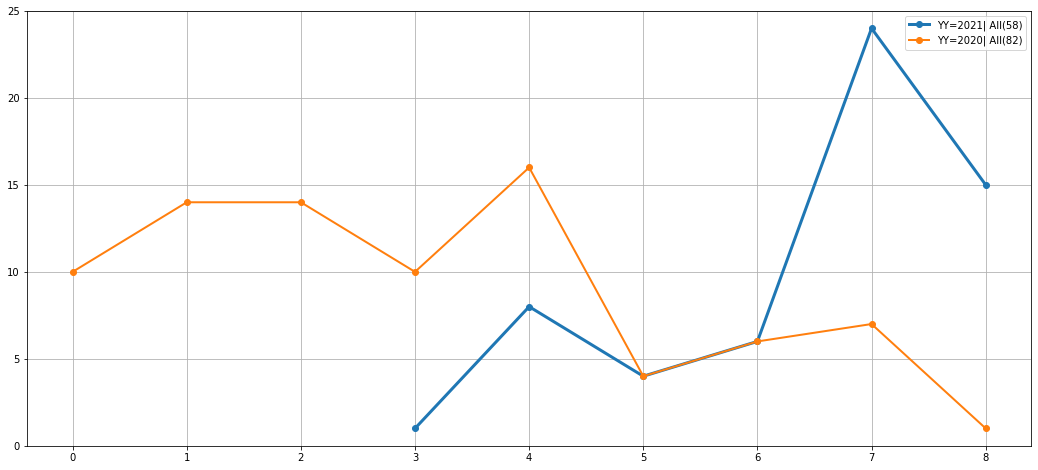

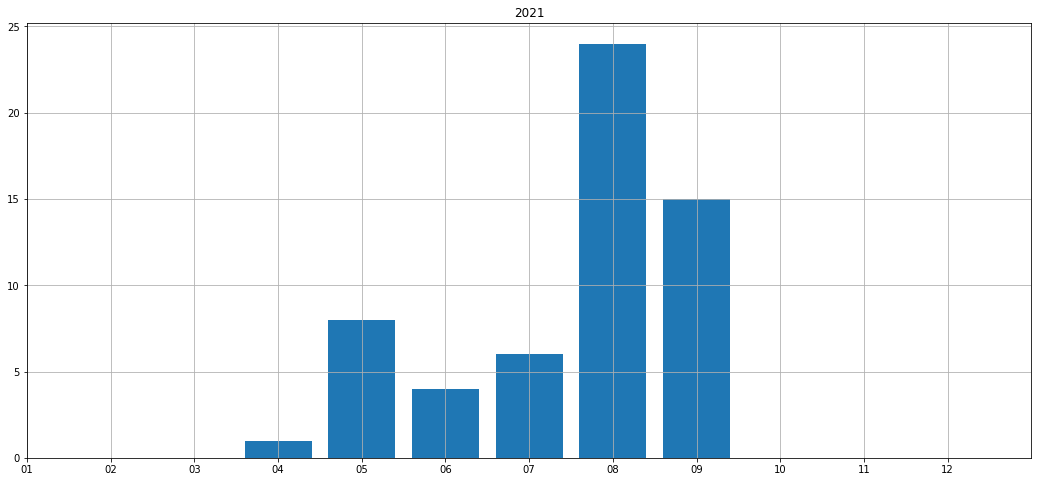

In [380]:
# tmp = load_data().groupby(["yy","mm"]).agg({"title":"count"})
# _df = [ df[df["yy"]==yy] for yy in sorted(df["yy"].unique().tolist()) ]
# _title = [ yy for yy in sorted(df["yy"].unique().tolist()) ]
# tmp = tmp.reset_index()
# plot_bar(tmp,"title")
def pivot_df():
    df = load_data()
    df = df.groupby(["yy","mm"]).count().reset_index()
    df = df.pivot(index='mm', columns='yy', values='title')
    df = df.reset_index()
    return df

df = pivot_df()
# df.columns
# _col = ['2010', '2011', '2012', '2013']
# _col = ['2014','2015', '2016']
# _col = ['2017','2018', '2019']
_col = ['2020', '2021']
plot_line(df,_col)
plot_bar(df,"2021")